# Gradient Descent Implementation
The class below implements gradient descent as well as a few other utility functions needed for gradient descent. A numerical gradient is calculated by finding the slope from the current point to a point really close to it (specifically, differing by quantity self.delta).

In [38]:
import math
class GradientDescender(object):
    """
    Implements a class that abstracts away the properties of taking a gradient
    and performing gradient descent on a function f with a given delta.
    """
    def __init__(self, delta, numIters, thresh):
        """
        delta : step size to compute numerical gradient
        numIters : number of iterations to run gradient descent
        thresh : The threshold for the length of the norm to be under for gradient
                 descent to stop.
        self.prevPath will always contain the points visited on the path of the
        most recent gradient descent. Not the best design decision, but does the
        job for the second part of question 2.
        """
        self.delta = delta
        self.numIters = numIters
        self.thresh = thresh
        self.prevPath = []
    
    def gradient(self, f, x):
        """
        f : function with len(x) arguments
        x : array representing the point at which to take the gradient
        Computes numerically the gradient of f at x by calculating the slope from x
        to x + self.delta. Assumes the input is valid,
        e.g. len(x) == the number of arguments that f takes in.
        """
        result = []
        xNew = x[:]
        for i in range(len(x)):
            xNew[i] += self.delta
            result.append( float(f(*xNew) - f(*x)) / self.delta )
            xNew[i] -= self.delta
        return result
    
    def norm(self, x):
        """
        x : array of numbers
        Computes a Euclidean norm of x.
        """
        return math.sqrt(sum( [x[i]**2 for i in range(len(x))] ))
    
    def gradientDescent(self, f, x, gamma):
        """
        f : function with len(x) arguments
        x : array representing the point at which to start the gradient descent
        gamma : step size for the gradient descent.
        Performs a gradient descent on f starting at x with the given gamma.
        Keeps stepping until we reach self.numIters steps, which at that point
        returns failure. Return success if the norm of the gradient is <= self.thresh.
        Return values are given as tuples as:
        (number of iterations it took to get there or -1 if failure, local minimum found)
        """
        xRes = x[:]
        self.prevPath = []
        for i in range(self.numIters + 1):
            self.prevPath.append(xRes[:])
            grad = self.gradient(f, xRes)
            if self.norm(grad) <= self.thresh:
                return i, xRes
            for i in range(len(x)):
                xRes[i] -= gamma * grad[i]
        return -1, xRes
    
gradientDelta = 0.000001; numIters = 10000; thresh = 10**(-12)
gradDescender = GradientDescender(gradientDelta, numIters, thresh)

Below is a test driver to make sure that the numerical gradient calculation is accurate. The numerical gradient calculated is compared against the analytical gradient for N = 1000 random values between -bound and bound, where bound = 1000. The assertion is that the two values are less than 1% apart. This assertion is true, so the numerical gradient calculation is accurate up to 1%, which should suffice for this assignment.

In [39]:
import random
def testGradient(N):
    """
    N : number of tests
    This function tests if the numerical gradient is accurate to the analytical gradient to one percent error.
    This function picks a random number in the range [-bound, bound], and checks if the numerical gradient is
    accurate to the analytical gradient. It repeats this for N times.
    Uncomment the print statement to see the numerical results.
    """
    f = lambda w1, w2: ( (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2 )
    fGrad = lambda w1, w2: [4*w1*(w1**2 + w2 - 11) + 2*(w1 + w2**2 - 7), 
                            2*(w1**2 + w2 - 11) + 4*w2*(w1 + w2**2 - 7)]
    percentDiff = lambda a, b: abs(a - b) / (float(a + b) / 2)
    gradientDelta = 0.000001; numIters = 10000; thresh = 10**(-12)
    grad = GradientDescender(gradientDelta, numIters, thresh)
    accuracyDelta = 0.01
    bound = 1000
    for _ in range(N):
        x = [random.uniform(-bound, bound) for _ in range(2)]
        nGradient = grad.gradient(f, x)
        aGradient = fGrad(*x)
        # print "nGradient = {}. aGradient = {}".format(nGradient, aGradient)
        assert( all([percentDiff(nGradient[i], aGradient[i]) <= accuracyDelta for i in range(len(nGradient))]) )
testGradient(1000)
print "The numerical gradient is precise up to 1% error!"

The numerical gradient is precise up to 1% error!


# Problem 1
We can define f simply by using a lambda expression. Now, we can run gradient descent on $f$ using the library implemented above.

In [40]:
f = lambda w1, w2: ( (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2 )

Here is the gradient descent run from $w^0$ = [0 -4] and with step size 0.005. The result shows that
$$ 
w^* = [-3.7793109272935768, -3.2831867070533765]
$$
and it took 93 iterations for the algorithm to converge.

In [41]:
w0 = [0, -4]
gamma0 = 0.005
print gradDescender.gradientDescent(f, w0, gamma0)

(93, [-3.7793109272935768, -3.2831867070533765])


Here is the gradient descent run from $w0$ = [0 -4] and with step size 0.01. The result shows that 
$$
w^* = [-3.7793109272935808, -3.2831867070533804]
$$
and it took 38 iterations for the algorithm to converge.

In [42]:
gamma1 = 0.01
print gradDescender.gradientDescent(f, w0, gamma1)

(38, [-3.7793109272935808, -3.2831867070533804])


It seems that generally, the larger the step size, the lesser the number of iterations needed for the gradient descent to converge.

# Problem 2
Here is the run of gradient descent with step size $\gamma = 0.01$ for the four initializations $w0 = [0, -4], w1 = [0.5, -4], w2 = [0, 4], w3 = [0.5, 4]$

In [43]:
gamma = 0.01
w0 = [0, -4]
w1 = [0.5, -4]
w2 = [0, 4]
w3 = [0.5, 4]
print "w0: {}".format(gradDescender.gradientDescent(f, w0, gamma))
path0 = gradDescender.prevPath
print "w1: {}".format(gradDescender.gradientDescent(f, w1, gamma))
path1 = gradDescender.prevPath
print "w2: {}".format(gradDescender.gradientDescent(f, w2, gamma))
path2 = gradDescender.prevPath
print "w3: {}".format(gradDescender.gradientDescent(f, w3, gamma))
path3 = gradDescender.prevPath

w0: (38, [-3.7793109272935808, -3.2831867070533804])
w1: (91, [3.584427866025155, -1.8481269146302344])
w2: (41, [-2.805118577067842, 3.13131202620035])
w3: (111, [2.99999956616254, 1.9999997551984263])


None of the solutions are the same. Based on the information available, the solutions are local minima and not global minima.

Here is the countour plot with the gradient descent paths overlayed on top in red:

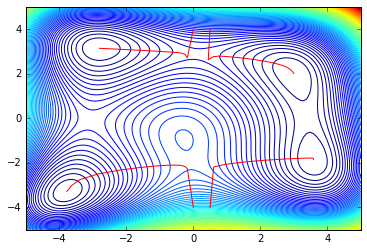

In [44]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, 100)

for i, path in enumerate([path0, path1, path2, path3]):
    xPts = [pt[0] for pt in path]
    yPts = [pt[1] for pt in path]
    plt.plot(xPts, yPts, 'r')

# Problem 3
Here is the code to generate the Gaussian random vectors of size $N = 10^j, j = 1, \dots 6$ and to check the instantaneous error of the sample mean to the actual mean. Note that this may take a long time to run, especially since later on it needs to generate a million random samples from the given distribution.

In [21]:
from scipy.stats import multivariate_normal
import numpy as np

numElems = 5
meanVector = [-1, 0, 4, 1, 0.5]
covariance = 2 * np.identity(numElems)
distribution = multivariate_normal(meanVector, covariance)
meanEstimates = []
instaErrors = []

for j in range(1, 7):
    N = 10 ** j
    X = [distribution.rvs() for _ in range(N)]
    meanEstimate = [0 for _ in range(numElems)]
    for i in range(numElems):
        meanEstimate[i] = float(sum([X[n][i] for n in range(N)])) / N
    instaError = np.square(np.linalg.norm(np.array(meanEstimate) - np.array(meanVector)))
    meanEstimates.append(meanEstimate)
    instaErrors.append(instaError)
    print "N = {}, meanEstimate = {}, instant. error = {}".format(N, meanEstimate, instaError)


N = 10, meanEstimate = [-0.8549154746308769, -0.433090026326826, 3.8994590686305606, 1.0893518992064783, -0.08811807397597293], instant. error = 0.572591600115
N = 100, meanEstimate = [-1.2320448770223527, -0.1738679344264006, 4.126900433902135, 1.1510373069574953, 0.7027258193271549], instant. error = 0.164088629613
N = 1000, meanEstimate = [-0.9306980383628436, -0.039576896101032086, 4.043589857344697, 0.9758993824329967, 0.5449034344801216], instant. error = 0.0108663264503
N = 10000, meanEstimate = [-0.9862901087331056, -0.010125633733840638, 3.996138693674899, 0.9810681870565686, 0.49768910065184035], instant. error = 0.000669153060721
N = 100000, meanEstimate = [-1.0009565004198977, -0.010801398968507583, 4.003687186766438, 0.9998531111258807, 0.5039269641993943], instant. error = 0.000146623083145
N = 1000000, meanEstimate = [-1.0021260451499057, 0.0006451633856597105, 4.000335377283723, 1.002158655425605, 0.4996398815086364], instant. error = 9.83826027039e-06


Here is the code to generate the log-log plot of $e_N$ as a function of $N$.

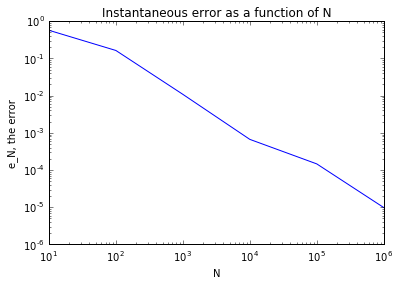

In [25]:
import matplotlib.pyplot as plt
plt.loglog([10 ** j for j in range(1, 7)], instaErrors)
plt.title("Instantaneous error as a function of N")
plt.ylabel("e_N, the error")
plt.xlabel("N")
plt.show()

$\log e_N$ seems to decrease linearly with respect to $N$. This implies
$$
\log e_N = -k\log N
$$
for some $k > 0$. Then,
$$
e_N = N^{-k}
$$
so the error is related inversely with $N^k$ for some $k > 0$, meaning that the error decreases quickly as $N$ becomes larger. This is consistent with the Central Limit Theorem.